# Feature Engineering and Modelling

A cleaned dataset was used here for feature engineering and model making. The main objective of this program is to identify the feature/s that affects `churn` and verify whether giving discounts will be profitable for the company.

## Importing dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

from datetime import datetime

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Data Loading

Index column was removed from the dataset. The dates in the dataset were all converted into dates datatype for efficient usage.

In [2]:
eda = pd.read_csv('data/clean_eda_data.csv')
eda.head()

Unnamed: 0                                id   
0           0  24011ae4ebbe3035111d65fa7c15bc57  \
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month   
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0  \
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   date_activ    date_end date_modif_prod date_renewal  ...   
0  2013-06-15  2016-06-15      2015-11-01   2015-06-23  ...  \
1  2009-08-21  2016-08-30      2009-08-21   2015-08-31  ...   
2  2010-04-16  2016-04-16      2010-04-16   2015-04-17  ...   
3  2010-03-30  2016-03-30      2010-03-30   2015-03-31  ...   
4  2010-01-13  2016-03-07      2010-01-13   2015-03-09  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var   
0                    0.131756                0.092638  \
1                    0.147600                0.000000   
2                    0.167798                0.088409   
3                    0.148586                0.000000   
4                    0.119906                0.101673   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix   
0                    0.036909                   42.497907  \
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak   
0               12.218665                    8.145777               42.629663  \
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   
3                0.000000                    0.000000               44.593296   
4               24.437330                   16.291555               40.848791   

  mean_3m_price_peak  mean_3m_price_mid_peak  churn  
0          12.311304                8.182687      1  
1           0.000000                0.000000      0  
2           0.088409                0.000000      0  
3           0.000000                0.000000      0  
4          24.539003               16.365274      0  

[5 rows x 54 columns]

In [3]:
eda["date_activ"] = pd.to_datetime(eda["date_activ"], format='%Y-%m-%d')
eda["date_end"] = pd.to_datetime(eda["date_end"], format='%Y-%m-%d')
eda["date_modif_prod"] = pd.to_datetime(eda["date_modif_prod"], format='%Y-%m-%d')
eda["date_renewal"] = pd.to_datetime(eda["date_renewal"], format='%Y-%m-%d')

eda.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
eda.head()

id                     channel_sales   
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua  \
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end   
0         0         54946                0 2013-06-15 2016-06-15  \
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...   
0      2015-11-01   2015-06-23               0.00  ...  \
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var   
0                    0.131756                0.092638  \
1                    0.147600                0.000000   
2                    0.167798                0.088409   
3                    0.148586                0.000000   
4                    0.119906                0.101673   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix   
0                    0.036909                   42.497907  \
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix mean_3m_price_off_peak   
0               12.218665                    8.145777              42.629663  \
1                0.000000                    0.000000              44.592310   
2                0.000000                    0.000000              44.612508   
3                0.000000                    0.000000              44.593296   
4               24.437330                   16.291555              40.848791   

   mean_3m_price_peak  mean_3m_price_mid_peak  churn  
0           12.311304                8.182687      1  
1            0.000000                0.000000      0  
2            0.088409                0.000000      0  
3            0.000000                0.000000      0  
4           24.539003               16.365274      0  

[5 rows x 53 columns]

## Feature Engineering

The feauture `the difference between off-peak prices in December and January the preceding year` was applied here.

In [5]:
price = pd.read_csv('data/price_data.csv')
price['price_date'] = pd.to_datetime(price['price_date'], format='%Y-%m-%d')
price.head()

id price_date  price_off_peak_var   
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367  \
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix   
0             0.0                 0.0           44.266931             0.0  \
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [6]:
# Group off-peak prices by companies and month
monthly_price_by_id = price.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy   
0  0002203ffbb812588b632b9e628cc38d                        -0.006192  \
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

## Gradual Average Price Change

This helps improve the feature that my colleague created, instead of computing the average price the entire year. This feature also adds granularity since we now have features that look at the average price disparities across time periods.

In [7]:
mean_prices = price.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
    'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'
}).reset_index()

In [8]:
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [9]:
columns = ['id', 'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff', 
           'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']

eda = pd.merge(eda, mean_prices[columns], on='id')
eda.head()

id                     channel_sales   
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua  \
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end   
0         0         54946                0 2013-06-15 2016-06-15  \
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...   
0      2015-11-01   2015-06-23               0.00  ...  \
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_off_peak  mean_3m_price_peak  mean_3m_price_mid_peak  churn   
0               42.629663           12.311304                8.182687      1  \
1               44.592310            0.000000                0.000000      0   
2               44.612508            0.088409                0.000000      0   
3               44.593296            0.000000                0.000000      0   
4               40.848791           24.539003               16.365274      0   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff   
0                     0.024038                     0.034219  \
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

  off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff   
0                        0.058257                    18.590255  \
1                        0.149609                    44.311375   
2                        0.170512                    44.385450   
3                        0.151210                    44.400265   
4                        0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 59 columns]

## Maximum price changes per month

This feature will help PowerCo understand the point of view of customers. If I am a customer of PowerCo, the least thing I would want is unexpected price increase between months and a significant price increase within a short period of time. That would trigger me to find another utility service provider.

In [10]:
mean_prices_by_month = price.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                     'price_peak_var': 'mean', 
                                                                     'price_mid_peak_var': 'mean', 
                                                                     'price_off_peak_fix': 'mean', 
                                                                     'price_peak_fix': 'mean', 
                                                                     'price_mid_peak_fix': 'mean'}).reset_index()

In [11]:
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [12]:
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [13]:
columns = ['id', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff', 
           'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff', 
           'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff']

eda = pd.merge(eda, max_diff_across_periods_months[columns], on='id')
eda.head()

id                     channel_sales   
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua  \
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end   
0         0         54946                0 2013-06-15 2016-06-15  \
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...   
0      2015-11-01   2015-06-23               0.00  ...  \
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff   
0                         0.058257                    18.590255  \
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff   
0                     7.450670                        26.040925  \
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff   
0                            0.060550                            0.085483  \
1                            0.151367                            0.085483   
2                            0.084587                            0.089162   
3                            0.153133                            0.000000   
4                            0.022225                            0.033743   

  off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff   
0                               0.146033                           44.266930  \
1                               0.151367                           44.444710   
2                               0.172468                           44.444710   
3                               0.153133                           44.444710   
4                               0.055866                           16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            8.145775                                24.43733  

[5 rows x 65 columns]

## Tenure

How long a company has been a client of PowerCo and the `churn` rate.

In [14]:
eda['tenure'] = ((eda['date_end'] - eda['date_activ']) / np.timedelta64(1, 'Y')).astype(int)

As seen in the table below, companies who have been clients of PowerCo for four months and below have higher chance to churn.

In [15]:
eda.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
2       0.176471
3       0.143987
4       0.127473
13      0.095238
5       0.091999
12      0.083333
7       0.075472
6       0.075407
11      0.059783
8       0.047244
10      0.045455
9       0.012500

## Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

Since dates as datetime object are not useful for creating the model, we needed to use the datetimes to create some other features that may hold some predictive power.

In [16]:
def to_months(ref_date, eda, column):
    time_delta = ref_date - eda[column]
    months = time_delta / np.timedelta64(1, 'M').astype(int)
    return months

In [17]:
ref_date = datetime(2020, 1, 1)

eda['months_activ'] = to_months(ref_date, eda, 'date_activ')
eda['months_end'] = to_months(ref_date, eda, 'date_end')
eda['months_modif_prod'] = to_months(ref_date, eda, 'date_modif_prod')
eda['months_renewal'] = to_months(ref_date, eda, 'date_renewal')

We can now remove `date_active`, `date_end`, `date_modif_prod`, and `date_renewal`.

In [18]:
remove_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

eda = eda.drop(remove_columns, axis=1)
eda.head()

id                     channel_sales   
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua  \
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
0         0         54946                0               0.00  \
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m   
0                   0                       0.0                     1.78  \
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_max_monthly_diff   
0                        0.114481  ...                            0.085483  \
1                        0.145711  ...                            0.085483   
2                        0.165794  ...                            0.089162   
3                        0.146694  ...                            0.000000   
4                        0.116900  ...                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff   
0                                0.146033                          44.266930  \
1                                0.151367                          44.444710   
2                                0.172468                          44.444710   
3                                0.153133                          44.444710   
4                                0.055866                          16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff   
0                            8.145775                                44.26693  \
1                            0.000000                                44.44471   
2                            0.000000                                44.44471   
3                            0.000000                                44.44471   
4                            8.145775                                24.43733   

   tenure  months_activ  months_end  months_modif_prod months_renewal  
0       3     2391 days   1295 days          1522 days      1653 days  
1       7     3785 days   1219 days          3785 days      1584 days  
2       6     3547 days   1355 days          3547 days      1720 days  
3       6     3564 days   1372 days          3564 days      1737 days  
4       6     3640 days   1395 days          3640 days      1759 days  

[5 rows x 66 columns]

## Transforming boolean data

It is essential for creating a model.

In [19]:
eda['has_gas'] = eda['has_gas'].map({'t': 1, 'f': 0})

We can see in the table below that a client that does not have purchase gas has a higher chance of churning than those who purchase gas.

In [20]:
eda.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

## Creating dummy features

I converted the object columns into categorical columns. It is another essential step in creating a predictive model. The idea is converting the columns into category datatype, finding the least occured categories and removing them.

In [21]:
eda['channel_sales'] = eda['channel_sales'].astype('category')

In [22]:
eda['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [23]:
eda = pd.get_dummies(eda, columns=['channel_sales'], prefix='channel')
eda = eda.drop(['channel_sddiedcslfslkckwlfkdpoeeailfpeds',
                'channel_epumfxlbckeskwekxbiuasklxalciiuu',
                'channel_fixdbufsefwooaasfcxdxadsiekoceaa'], axis=1)

In [24]:
eda.head()

id  cons_12m  cons_gas_12m  cons_last_month   
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0  \
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy   
0               0.00                   0                       0.0  \
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak   
0                     1.78                        0.114481  \
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_end   
0                    0.098142  ...       3     2391 days   1295 days  \
1                    0.000000  ...       7     3785 days   1219 days   
2                    0.087899  ...       6     3547 days   1355 days   
3                    0.000000  ...       6     3564 days   1372 days   
4                    0.100015  ...       6     3640 days   1395 days   

   months_modif_prod  months_renewal  channel_MISSING   
0          1522 days       1653 days            False  \
1          3785 days       1584 days             True   
2          3547 days       1720 days            False   
3          3564 days       1737 days            False   
4          3640 days       1759 days             True   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci   
0                                     False  \
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua   
0                                      True  \
1                                     False   
2                                      True   
3                                     False   
4                                     False   

  channel_lmkebamcaaclubfxadlmueccxoimlema   
0                                    False  \
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False  

[5 rows x 70 columns]

In [25]:
eda['origin_up'] = eda['origin_up'].astype('category')
eda['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [26]:
eda = pd.get_dummies(eda, columns=['origin_up'], prefix='origin_up')
eda = eda.drop(['origin_up_MISSING',
                'origin_up_usapbepcfoloekilkwsdiboslwaxobdp',
                'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'], axis=1)
eda.head()

id  cons_12m  cons_gas_12m  cons_last_month   
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0  \
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy   
0               0.00                   0                       0.0  \
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak   
0                     1.78                        0.114481  \
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal   
0                    0.098142  ...          1522 days       1653 days  \
1                    0.000000  ...          3785 days       1584 days   
2                    0.087899  ...          3547 days       1720 days   
3                    0.000000  ...          3564 days       1737 days   
4                    0.100015  ...          3640 days       1759 days   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci   
0            False                                     False  \
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua   
0                                      True  \
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema   
0                                     False  \
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf   
0                                     False  \
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   
0                                       False  \
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci   
0                                       False  \
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 72 columns]

## Transforming numerical data

Some features have high skewness. High skewness is not always a problem, but we have to treat highly skewed variables because some predictive models contain built-in presumptions about how the features being given to it are distributed. For this instance, we will transform the numerical values into logarithm.

**Note**: Since values that are 0 cannot be transformed to logarithm, we will add 1.

In [27]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

eda[skewed].describe().T

count           mean            std  min   
cons_12m                        14605.0  159230.267032  573483.629064  0.0  \
cons_gas_12m                    14605.0   28091.082506  162978.563803  0.0   
cons_last_month                 14605.0   16091.371448   64366.262314  0.0   
forecast_cons_12m               14605.0    1868.638618    2387.651549  0.0   
forecast_cons_year              14605.0    1399.858747    3247.876793  0.0   
forecast_discount_energy        14605.0       0.966450       5.108355  0.0   
forecast_meter_rent_12m         14605.0      63.090448      66.166636  0.0   
forecast_price_energy_off_peak  14605.0       0.137282       0.024623  0.0   
forecast_price_energy_peak      14605.0       0.050488       0.049037  0.0   
forecast_price_pow_off_peak     14605.0      43.130085       4.486140  0.0   

                                        25%           50%           75%   
cons_12m                        5674.000000  14116.000000  40764.000000  \
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    793.000000   3383.000000   
forecast_cons_12m                494.980000   1112.610000   2402.270000   
forecast_cons_year                 0.000000    314.000000   1746.000000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.800000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01

In [28]:
eda["cons_12m"] = np.log10(eda["cons_12m"] + 1)
eda["cons_gas_12m"] = np.log10(eda["cons_gas_12m"] + 1)
eda["cons_last_month"] = np.log10(eda["cons_last_month"] + 1)
eda["forecast_cons_12m"] = np.log10(eda["forecast_cons_12m"] + 1)
eda["forecast_cons_year"] = np.log10(eda["forecast_cons_year"] + 1)
eda["forecast_meter_rent_12m"] = np.log10(eda["forecast_meter_rent_12m"] + 1)
eda["imp_cons"] = np.log10(eda["imp_cons"] + 1)

## Checking Correlation of Variables

This reveals the linear relationships between features. Obviously, we want the features to correlate with `churn` since it is our predictive feature. However, features that have very high correlation can cause problems since it could indicate that they share similar values. Ideally, we want all features to have 0 correlation except `churn`.

In [29]:
#find correlation of all features that are either int or float
correlation = eda.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()

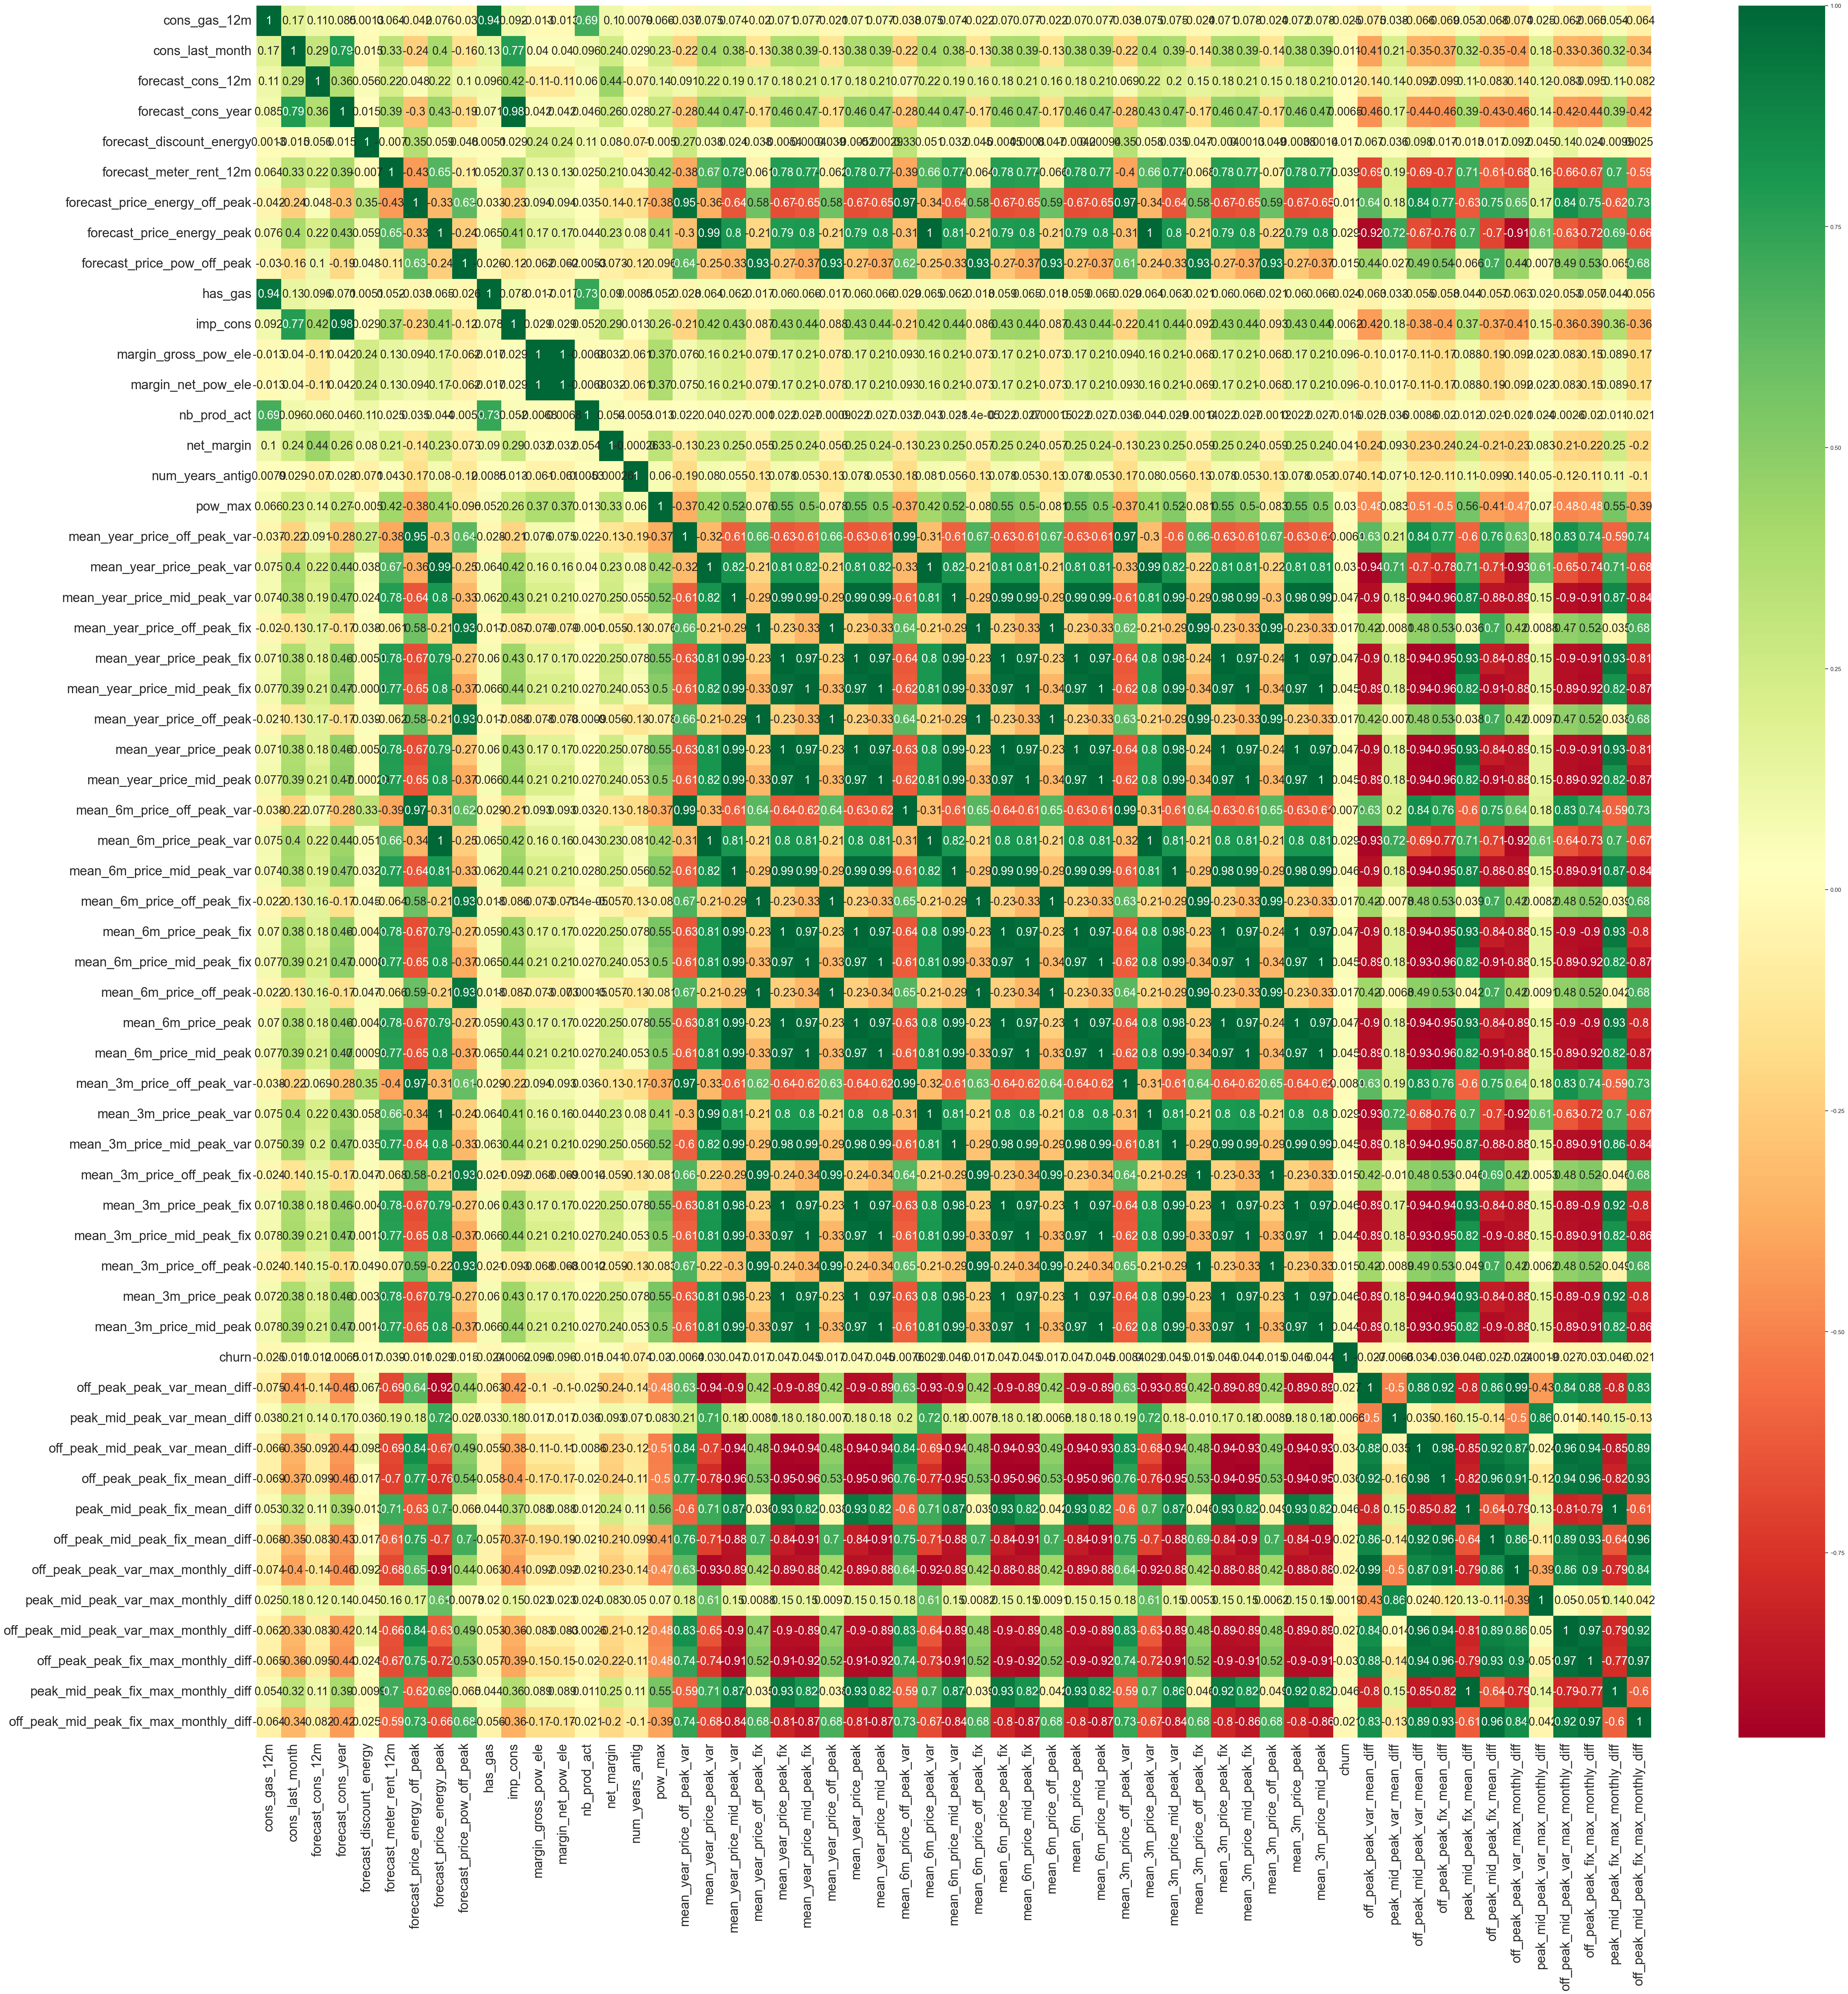

In [30]:
plt.figure(figsize=(60, 60))
sns.heatmap(correlation,
            vmax=1, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,
            annot=True,
            annot_kws={'size': 22}, 
            cmap='RdYlGn')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

`num_years_antig` and `forecast_cons_year` displayed high correlation. Hence, I will drop those two features.

In [31]:
eda.drop(['num_years_antig', 'forecast_cons_year'], axis=1, inplace=True)

In [32]:
eda.head()

id  cons_12m  cons_gas_12m  cons_last_month   
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000  \
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m   
0           0.000000                       0.0                 0.444045  \
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak   
0                        0.114481                    0.098142  \
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal   
0                    40.606701  ...          1522 days       1653 days  \
1                    44.311378  ...          3785 days       1584 days   
2                    44.311378  ...          3547 days       1720 days   
3                    44.311378  ...          3564 days       1737 days   
4                    40.606701  ...          3640 days       1759 days   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci   
0            False                                     False  \
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua   
0                                      True  \
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema   
0                                     False  \
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf   
0                                     False  \
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   
0                                       False  \
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci   
0                                       False  \
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 70 columns]

In [33]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 70 columns):
 #   Column                                      Non-Null Count  Dtype          
---  ------                                      --------------  -----          
 0   id                                          14605 non-null  object         
 1   cons_12m                                    14605 non-null  float64        
 2   cons_gas_12m                                14605 non-null  float64        
 3   cons_last_month                             14605 non-null  float64        
 4   forecast_cons_12m                           14605 non-null  float64        
 5   forecast_discount_energy                    14605 non-null  float64        
 6   forecast_meter_rent_12m                     14605 non-null  float64        
 7   forecast_price_energy_off_peak              14605 non-null  float64        
 8   forecast_price_energy_peak                  14605 non-null  float64        


## Further preparation of dataset for model making

All features should be of numerical. In order to be able to build a model, non-numerical features should be converted to numerical.

In [34]:
#convert all timedelta columns to int
eda['months_activ'] = eda['months_activ'].dt.days
eda['months_end'] = eda['months_end'].dt.days
eda['months_modif_prod'] = eda['months_modif_prod'].dt.days
eda['months_renewal'] = eda['months_renewal'].dt.days


In [35]:
eda.head()

id  cons_12m  cons_gas_12m  cons_last_month   
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000  \
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m   
0           0.000000                       0.0                 0.444045  \
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak   
0                        0.114481                    0.098142  \
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal   
0                    40.606701  ...               1522            1653  \
1                    44.311378  ...               3785            1584   
2                    44.311378  ...               3547            1720   
3                    44.311378  ...               3564            1737   
4                    40.606701  ...               3640            1759   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci   
0            False                                     False  \
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua   
0                                      True  \
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema   
0                                     False  \
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf   
0                                     False  \
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   
0                                       False  \
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci   
0                                       False  \
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 70 columns]

In [36]:
#convert all dummy columns to int
eda['channel_ewpakwlliwisiwduibdlfmalxowmwpci'] = eda['channel_ewpakwlliwisiwduibdlfmalxowmwpci'].astype(int)
eda['channel_MISSING'] = eda['channel_MISSING'].astype(int)
eda['channel_foosdfpfkusacimwkcsosbicdxkicaua'] = eda['channel_foosdfpfkusacimwkcsosbicdxkicaua'].astype(int)
eda['channel_lmkebamcaaclubfxadlmueccxoimlema'] = eda['channel_lmkebamcaaclubfxadlmueccxoimlema'].astype(int)
eda['channel_usilxuppasemubllopkaafesmlibmsdf'] = eda['channel_usilxuppasemubllopkaafesmlibmsdf'].astype(int)
eda['origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws'] = eda['origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws'].astype(int)
eda['origin_up_ldkssxwpmemidmecebumciepifcamkci'] = eda['origin_up_ldkssxwpmemidmecebumciepifcamkci'].astype(int)
eda['origin_up_lxidpiddsbxsbosboudacockeimpuepw'] = eda['origin_up_lxidpiddsbxsbosboudacockeimpuepw'].astype(int)

In [37]:
eda.head()

id  cons_12m  cons_gas_12m  cons_last_month   
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000  \
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m   
0           0.000000                       0.0                 0.444045  \
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak   
0                        0.114481                    0.098142  \
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal   
0                    40.606701  ...               1522            1653  \
1                    44.311378  ...               3785            1584   
2                    44.311378  ...               3547            1720   
3                    44.311378  ...               3564            1737   
4                    40.606701  ...               3640            1759   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci   
0                0                                         0  \
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua   
0                                         1  \
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema   
0                                         0  \
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   
0                                           0  \
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci   
0                                           0  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 70 columns]

In [38]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 70 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14605 non-null  object 
 1   cons_12m                                    14605 non-null  float64
 2   cons_gas_12m                                14605 non-null  float64
 3   cons_last_month                             14605 non-null  float64
 4   forecast_cons_12m                           14605 non-null  float64
 5   forecast_discount_energy                    14605 non-null  float64
 6   forecast_meter_rent_12m                     14605 non-null  float64
 7   forecast_price_energy_off_peak              14605 non-null  float64
 8   forecast_price_energy_peak                  14605 non-null  float64
 9   forecast_price_pow_off_peak                 14605 non-null  float64
 10  has_gas   

## Model Creation

For this task, we will use RandomForestClassifier as our predictive model.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Data Sampling

Division of the dataset into training and testing dataset. For this program, the dataset was divided 75-25. 75% is training set while 25% is testing set.

In [40]:
train_df = eda.copy()

In [41]:
x = eda.drop(['id', 'churn'], axis=1)
y = eda['churn']

In [42]:
x

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
0      0.000000      4.739944         0.000000           0.000000  \
1      3.668479      0.000000         0.000000           2.280920   
2      2.736397      0.000000         0.000000           1.689841   
3      3.200029      0.000000         0.000000           2.382089   
4      3.646011      0.000000         2.721811           2.650065   
...         ...           ...              ...                ...   
14600  4.508812      4.680707         0.000000           3.667360   
14601  3.858778      0.000000         2.260071           2.801191   
14602  3.265996      0.000000         2.255273           2.281919   
14603  2.120574      0.000000         0.000000           1.308351   
14604  3.941064      0.000000         0.000000           2.882758   

       forecast_discount_energy  forecast_meter_rent_12m   
0                           0.0                 0.444045  \
1                           0.0                 1.237292   
2                           0.0                 1.599009   
3                           0.0                 1.318689   
4                           0.0                 2.122969   
...                         ...                      ...   
14600                       0.0                 1.291591   
14601                       0.0                 2.161458   
14602                       0.0                 2.115943   
14603                       0.0                 0.912753   
14604                       0.0                 0.315970   

       forecast_price_energy_off_peak  forecast_price_energy_peak   
0                            0.114481                    0.098142  \
1                            0.145711                    0.000000   
2                            0.165794                    0.087899   
3                            0.146694                    0.000000   
4                            0.116900                    0.100015   
...                               ...                         ...   
14600                        0.138305                    0.000000   
14601                        0.100167                    0.091892   
14602                        0.116900                    0.100015   
14603                        0.145711                    0.000000   
14604                        0.167086                    0.088454   

       forecast_price_pow_off_peak  has_gas  ...  months_modif_prod   
0                        40.606701        1  ...               1522  \
1                        44.311378        0  ...               3785   
2                        44.311378        0  ...               3547   
3                        44.311378        0  ...               3564   
4                        40.606701        0  ...               3640   
...                            ...      ...  ...                ...   
14600                    44.311378        1  ...               1699   
14601                    58.995952        0  ...               2683   
14602                    40.606701        0  ...               2884   
14603                    44.311378        0  ...               2680   
14604                    45.311378        0  ...               3666   

       months_renewal  channel_MISSING   
0                1653                0  \
1                1584                1   
2                1720                0   
3                1737                0   
4                1759                1   
...               ...              ...   
14600            2046                0   
14601            1587                0   
14602            1787                0   
14603            1584                0   
14604            1472                1   

       channel_ewpakwlliwisiwduibdlfmalxowmwpci   
0                                             0  \
1                                             0   
2                                             0   
3                                             0   
4              

In [43]:
y

0        1
1        0
2        0
3        0
4        0
        ..
14600    0
14601    1
14602    1
14603    0
14604    0
Name: churn, Length: 14605, dtype: int64

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10953, 68)
(3652, 68)
(10953,)
(3652,)


## Building the model

I used `n_estimators=1000`. This means that the random forest will be consisted of 1000 decision trees. In building this model, it had a fair share of **advantages** and **disadvantages**.

**Advantages of Random Forest**
- Random forest uses a rule-based approach instead of a distance approach. Because of that, features don't need to be scaled.
- It can handle non-linear parameters better than linear based models.

**Disadvantages of Random Forest**
- It requires high computational power to train a random forest in a large dataset.
- Training time was longer due to increased complexity and size of the ensemble.

In [46]:
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy')
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

## Model prediction on x_test data

In [47]:
y_pred = rf_classifier.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model Evaluation

- Accuracy = the ratio of correctly predicted observations to the total observations
- Precision = the ability of the classifier to not label a negative sample as positive
- Recall = the ability of the classifier to find all the positive samples
- ROC & AUC = It tells how much the model is capable of distinguishing between classes.
- K-Fold Cross Validation = how the results of a statistical analysis will generalize to an independent data set.

The reason why I used these five metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure.

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score: {:.1f}%'.format(accuracy * 100))

Accuracy Score: 90.4%


In [49]:
train_accuracy = rf_classifier.score(x_train, y_train)
test_accuracy = rf_classifier.score(x_test, y_test)

print('Train Accuracy Score: {:.1f}%'.format(train_accuracy * 100))
print('Test Accuracy Score: {:.1f}%'.format(test_accuracy * 100))

Train Accuracy Score: 100.0%
Test Accuracy Score: 90.4%


In [50]:
cf = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cf)

Confusion Matrix: 
 [[3276    3]
 [ 349   24]]


In [51]:
tp, fp, tn, fn = cf.ravel()

print('True Prositive: ', tp)
print('False Prositive: ', fp)
print('True Negative: ', tn)
print('False Negative: ', fn)

True Prositive:  3276
False Prositive:  3
True Negative:  349
False Negative:  24


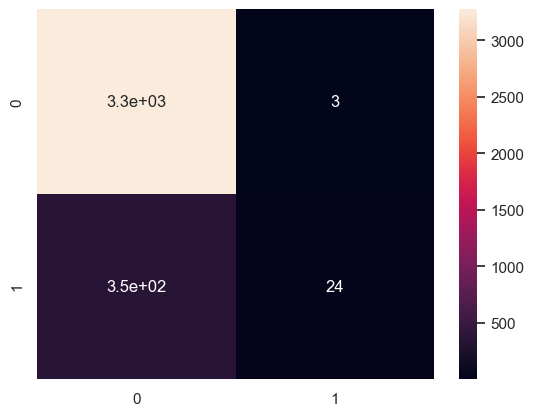

In [52]:
sns.heatmap(cf, annot=True)
plt.show()

In [53]:
recall = metrics.recall_score(y_test, y_pred) * 100
precision = metrics.precision_score(y_test, y_pred) * 100
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
type_1_err = (fp / (fp + tn)) * 100
type_2_err = (fn / (fn + tp)) * 100

print('Recall: {:.1f}%'.format(recall))
print('Precision: {:.1f}%'.format(precision))
print('Accuracy: {:.1f}%'.format(accuracy))
print('Type I Error: {:.1f}%'.format(type_1_err))
print('Type II Error: {:.1f}%'.format(type_2_err))

Recall: 6.4%
Precision: 88.9%
Accuracy: 90.4%
Type I Error: 0.9%
Type II Error: 0.7%


In [54]:
roc = roc_auc_score(y_test, y_pred)
print('ROC AUC Score: {:.1f}%'.format(roc * 100))

ROC AUC Score: 53.2%


In [55]:
f1_score = f1_score(y_test, y_pred)
print('F1 Score: {:.1f}%'.format(f1_score * 100))

F1 Score: 12.0%


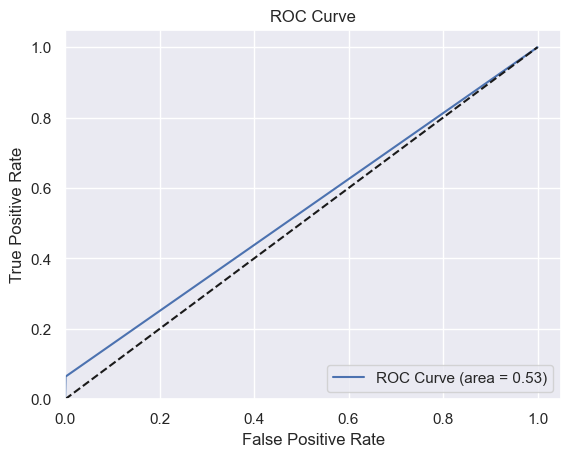

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
cv_scores = cross_val_score(rf_classifier, x_train, y_train, cv=5, scoring='accuracy')

print('Cross Validation Accuracy Scores: {}'.format(cv_scores))

Cross Validation Accuracy Scores: [0.90734824 0.91236878 0.90963031 0.90593607 0.90730594]


We can summarize cross validation accuracy score by calculating its mean.

In [59]:
print('Average Cross Validation Accuracy Score: {:.1f}%'.format(cv_scores.mean() * 100))

Average Cross Validation Accuracy Score: 90.9%


In [60]:
feature_importances = pd.DataFrame({
    'features': x_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=True).reset_index()

## Feature Importance

Which feature did higly contribute to the predictive power of the model?

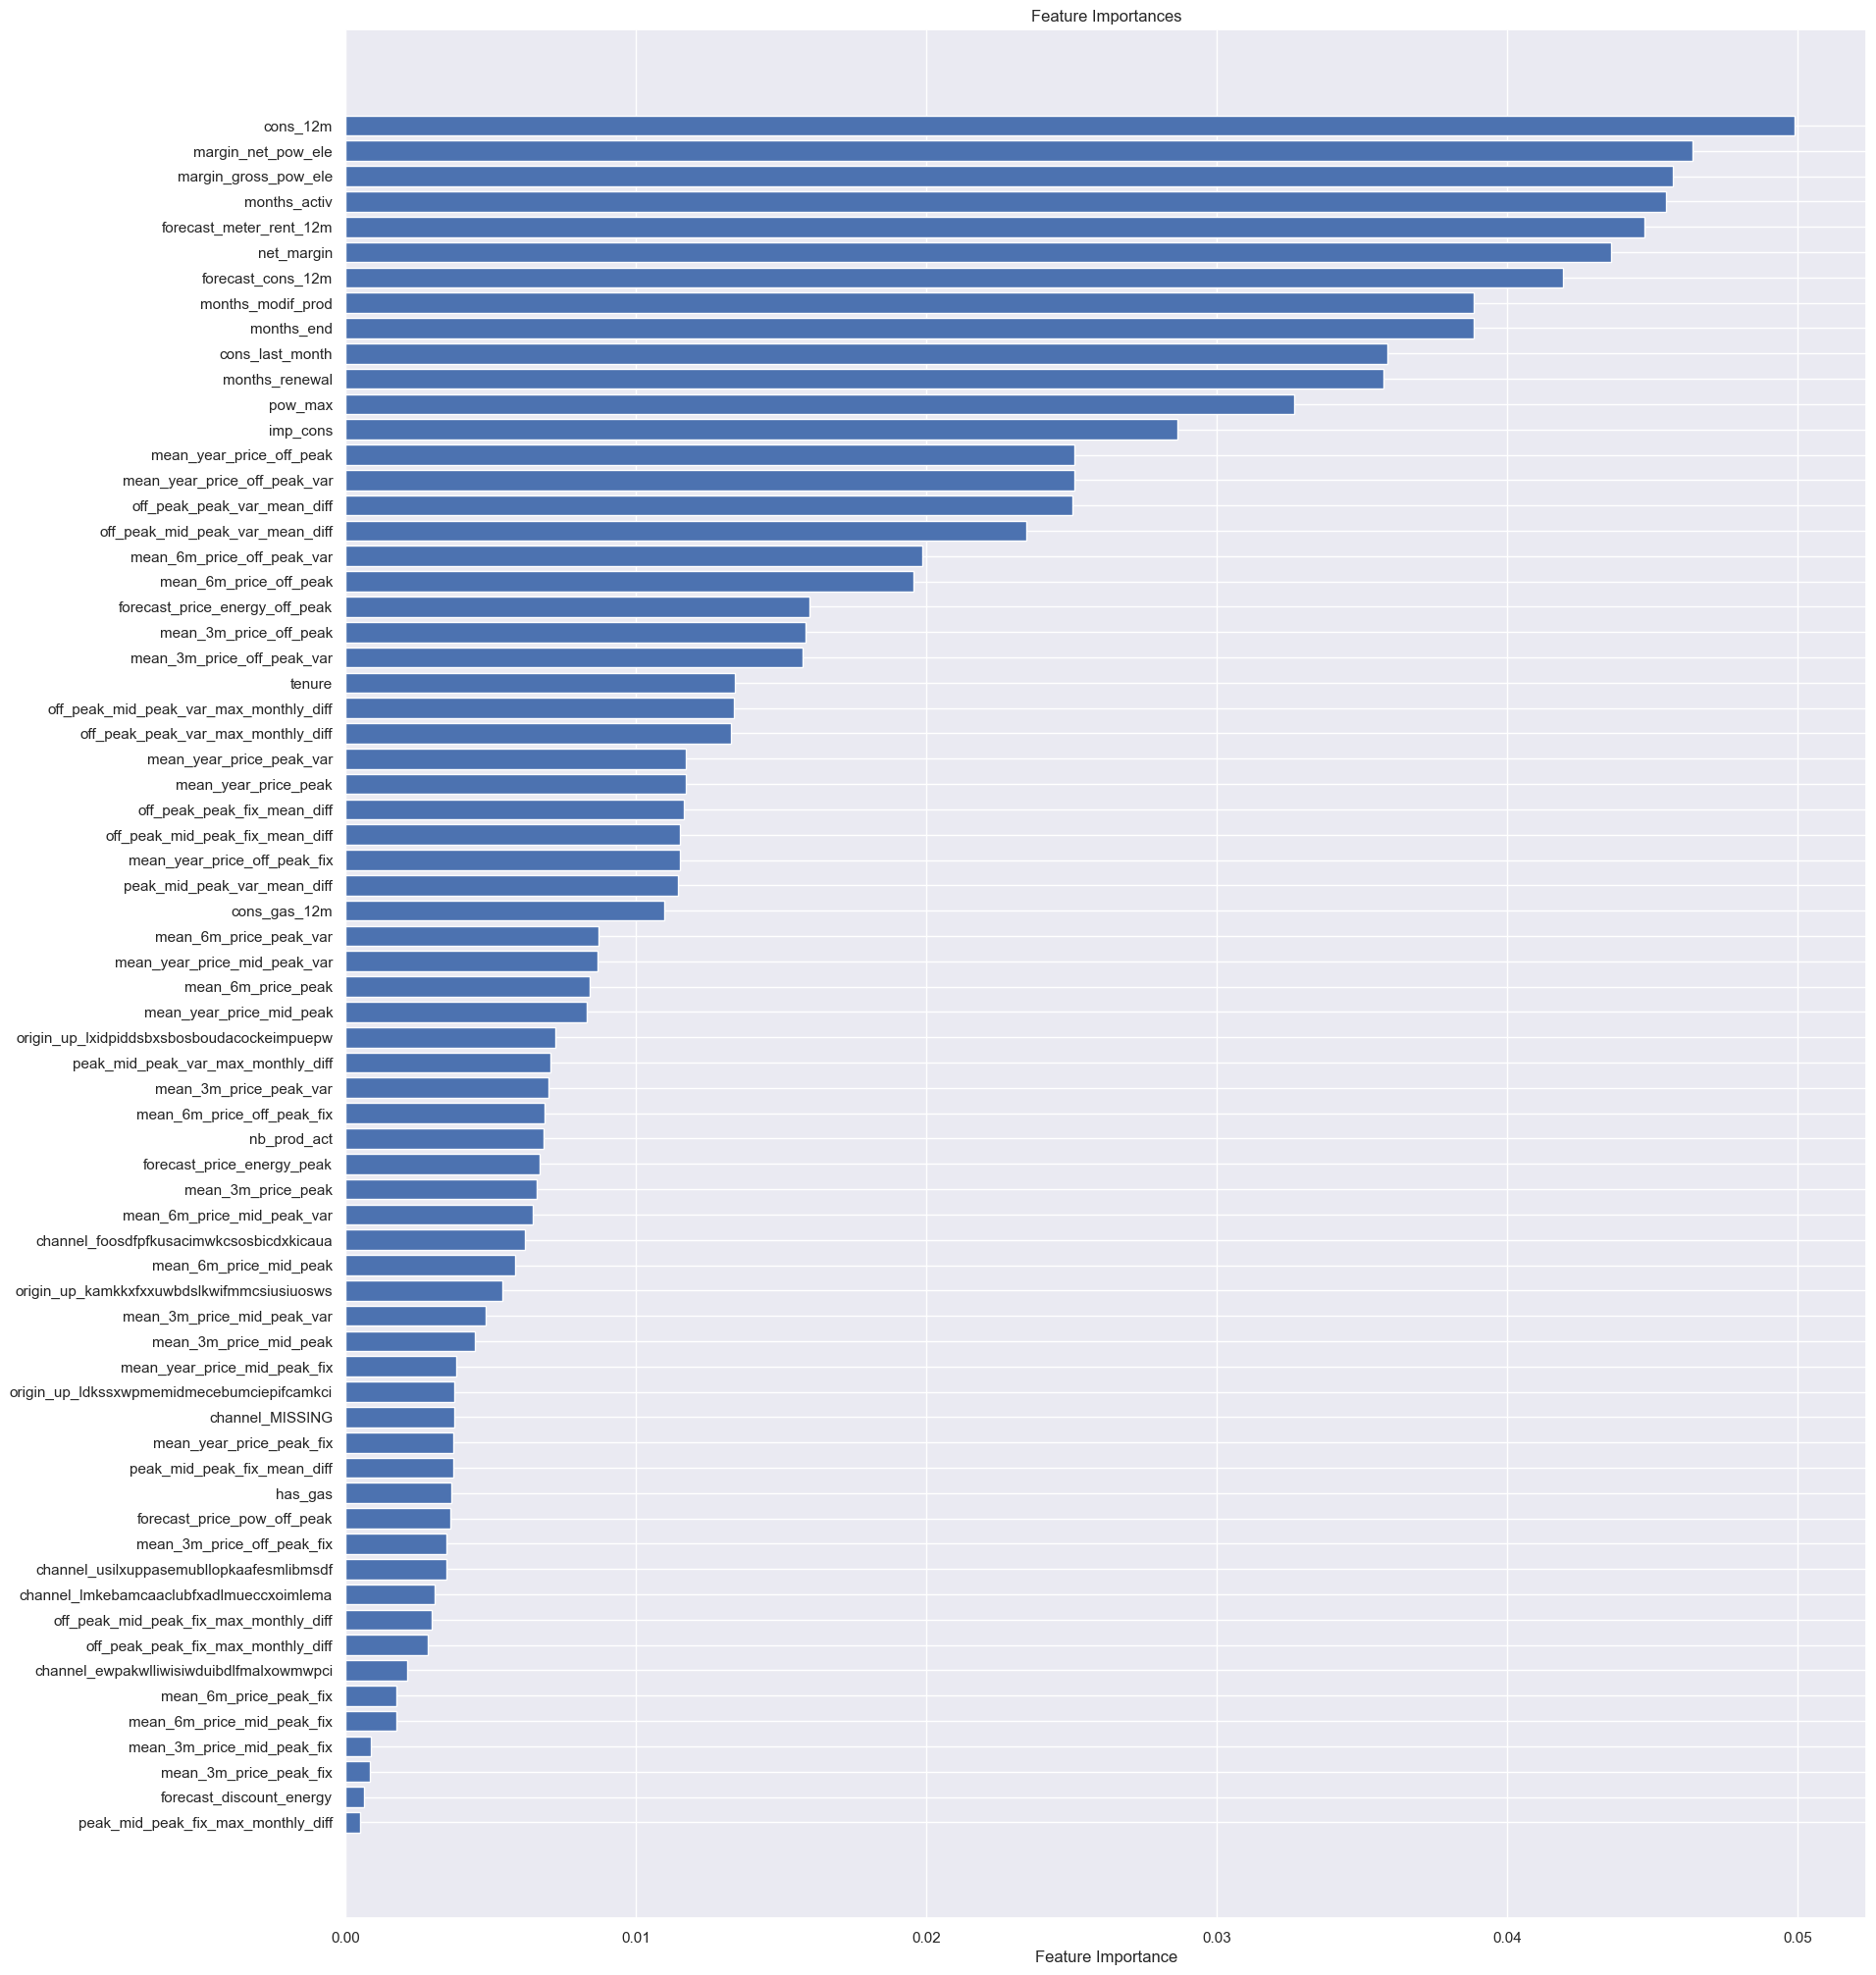

In [61]:
plt.figure(figsize=(20, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Feature Importance')
plt.show()

- Net margin on power consumption and consumption over 12 months are top drivers for churn in this model
- Price sensitivity features were scattered but not the main drivers for churn, which proves the result in the first task.

## Getting All Predictions and Saving in CSV file

In [62]:
proba_pred = rf_classifier.predict_proba(x_test)
probabilities = proba_pred[:, 1]
print(probabilities)

[0.545 0.098 0.007 ... 0.039 0.114 0.099]


In [63]:
predictions = y_pred.tolist()
print(predictions)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [64]:
x_test.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
4947   5.705621      0.000000         4.715176           0.000000  \
5868   6.000648      5.203623         5.050759           2.818932   
6805   0.000000      0.000000         0.000000           0.000000   
1323   4.345433      0.000000         0.000000           3.516690   
11759  3.201943      0.000000         2.484300           2.523109   

       forecast_discount_energy  forecast_meter_rent_12m   
4947                        0.0                 2.166341  \
5868                        0.0                 1.312177   
6805                        0.0                 2.125774   
1323                        0.0                 1.304921   
11759                       0.0                 1.238548   

       forecast_price_energy_off_peak  forecast_price_energy_peak   
4947                         0.120372                    0.103487  \
5868                         0.144902                    0.000000   
6805                         0.092453                    0.086393   
1323                         0.142996                    0.000000   
11759                        0.141434                    0.000000   

       forecast_price_pow_off_peak  has_gas  ...  months_modif_prod   
4947                     40.606701        0  ...               2549  \
5868                     44.311378        1  ...               3514   
6805                     59.173468        0  ...               4201   
1323                     44.311378        0  ...               1477   
11759                    44.311378        0  ...               1635   

       months_renewal  channel_MISSING   
4947             1452                0  \
5868             1687                0   
6805             1461                1   
1323             1784                0   
11759            1581                0   

       channel_ewpakwlliwisiwduibdlfmalxowmwpci   
4947                                          0  \
5868                                          0   
6805                                          0   
1323                                          0   
11759                                         0   

       channel_foosdfpfkusacimwkcsosbicdxkicaua   
4947                                          1  \
5868                                          0   
6805                                          0   
1323                                          1   
11759                                         1   

       channel_lmkebamcaaclubfxadlmueccxoimlema   
4947                                          0  \
5868                                          1   
6805                                          0   
1323                                          0   
11759                                         0   

       channel_usilxuppasemubllopkaafesmlibmsdf   
4947                                          0  \
5868                                          0   
6805                                          0   
1323                                          0   
11759                                         0   

       origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   
4947                                            0  \
5868                                            0   
6805                                            0   
1323                                            0   
11759                                           0   

       origin_up_ldkssxwpmemidmecebumciepifcamkci   
4947                                            0  \
5868                                            1   
6805                                            1   
1323                                            0   
11759                                           0   

       origin_up_lxidpiddsbxsbosboudacockeimpuepw  
4947                                            1  
5868                                            0  
6805                                            0  
1323                                            1  
11759     

In [65]:
x_test = x_test.reset_index()
x_test.head()

index  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
0   4947  5.705621      0.000000         4.715176           0.000000  \
1   5868  6.000648      5.203623         5.050759           2.818932   
2   6805  0.000000      0.000000         0.000000           0.000000   
3   1323  4.345433      0.000000         0.000000           3.516690   
4  11759  3.201943      0.000000         2.484300           2.523109   

   forecast_discount_energy  forecast_meter_rent_12m   
0                       0.0                 2.166341  \
1                       0.0                 1.312177   
2                       0.0                 2.125774   
3                       0.0                 1.304921   
4                       0.0                 1.238548   

   forecast_price_energy_off_peak  forecast_price_energy_peak   
0                        0.120372                    0.103487  \
1                        0.144902                    0.000000   
2                        0.092453                    0.086393   
3                        0.142996                    0.000000   
4                        0.141434                    0.000000   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal   
0                    40.606701  ...               2549            1452  \
1                    44.311378  ...               3514            1687   
2                    59.173468  ...               4201            1461   
3                    44.311378  ...               1477            1784   
4                    44.311378  ...               1635            1581   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci   
0                0                                         0  \
1                0                                         0   
2                1                                         0   
3                0                                         0   
4                0                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua   
0                                         1  \
1                                         0   
2                                         0   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema   
0                                         0  \
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   
0                                           0  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci   
0                                           0  \
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           1  
4                                           1  

[5 rows x 69 columns]

In [66]:
x_test = x_test.drop(['index'], axis=1)

In [67]:
x_test['churn'] = predictions
x_test['churn_proba'] = probabilities
x_test.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
0  5.705621      0.000000         4.715176           0.000000  \
1  6.000648      5.203623         5.050759           2.818932   
2  0.000000      0.000000         0.000000           0.000000   
3  4.345433      0.000000         0.000000           3.516690   
4  3.201943      0.000000         2.484300           2.523109   

   forecast_discount_energy  forecast_meter_rent_12m   
0                       0.0                 2.166341  \
1                       0.0                 1.312177   
2                       0.0                 2.125774   
3                       0.0                 1.304921   
4                       0.0                 1.238548   

   forecast_price_energy_off_peak  forecast_price_energy_peak   
0                        0.120372                    0.103487  \
1                        0.144902                    0.000000   
2                        0.092453                    0.086393   
3                        0.142996                    0.000000   
4                        0.141434                    0.000000   

   forecast_price_pow_off_peak  has_gas  ...  channel_MISSING   
0                    40.606701        0  ...                0  \
1                    44.311378        1  ...                0   
2                    59.173468        0  ...                1   
3                    44.311378        0  ...                0   
4                    44.311378        0  ...                0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua   
0                                         1  \
1                                         0   
2                                         0   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema   
0                                         0  \
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   
0                                           0  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci   
0                                           0  \
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_proba  
0                                           1      1        0.545  
1                                           0      0        0.098  
2                                           0      0        0.007  
3                                           1      0        0.116  
4                                           1      0        0.147  

[5 rows x 70 columns]

In [68]:
x_test.to_csv('data/predictions.csv', index=False)

## Business Impact of Discount

As mentioned in the earlier tasks, PowerCo plans on giving 20% discount on select customers. Here, I analyzed the potentyial impact of the said strategy.

In [69]:
test_data = pd.read_csv('data/predictions.csv')
test_data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
0  5.705621      0.000000         4.715176           0.000000  \
1  6.000648      5.203623         5.050759           2.818932   
2  0.000000      0.000000         0.000000           0.000000   
3  4.345433      0.000000         0.000000           3.516690   
4  3.201943      0.000000         2.484300           2.523109   

   forecast_discount_energy  forecast_meter_rent_12m   
0                       0.0                 2.166341  \
1                       0.0                 1.312177   
2                       0.0                 2.125774   
3                       0.0                 1.304921   
4                       0.0                 1.238548   

   forecast_price_energy_off_peak  forecast_price_energy_peak   
0                        0.120372                    0.103487  \
1                        0.144902                    0.000000   
2                        0.092453                    0.086393   
3                        0.142996                    0.000000   
4                        0.141434                    0.000000   

   forecast_price_pow_off_peak  has_gas  ...  channel_MISSING   
0                    40.606701        0  ...                0  \
1                    44.311378        1  ...                0   
2                    59.173468        0  ...                1   
3                    44.311378        0  ...                0   
4                    44.311378        0  ...                0   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua   
0                                         1  \
1                                         0   
2                                         0   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema   
0                                         0  \
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   
0                                           0  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci   
0                                           0  \
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_proba  
0                                           1      1        0.545  
1                                           0      0        0.098  
2                                           0      0        0.007  
3                                           1      0        0.116  
4                                           1      0        0.147  

[5 rows x 70 columns]

## Calculating Baseline Revenue (No Intervention)

I calculated the estimated baseline revenue for electricity for every customer for the next 12 months based on the forecast consumption, forecast price, and actual churn outcome. For those customers who have churned, I reduced the calculated forecast revenue by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year).

In [70]:
test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.019 * test_data['churn'])

In [71]:
test_data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
0  5.705621      0.000000         4.715176           0.000000  \
1  6.000648      5.203623         5.050759           2.818932   
2  0.000000      0.000000         0.000000           0.000000   
3  4.345433      0.000000         0.000000           3.516690   
4  3.201943      0.000000         2.484300           2.523109   

   forecast_discount_energy  forecast_meter_rent_12m   
0                       0.0                 2.166341  \
1                       0.0                 1.312177   
2                       0.0                 2.125774   
3                       0.0                 1.304921   
4                       0.0                 1.238548   

   forecast_price_energy_off_peak  forecast_price_energy_peak   
0                        0.120372                    0.103487  \
1                        0.144902                    0.000000   
2                        0.092453                    0.086393   
3                        0.142996                    0.000000   
4                        0.141434                    0.000000   

   forecast_price_pow_off_peak  has_gas  ...   
0                    40.606701        0  ...  \
1                    44.311378        1  ...   
2                    59.173468        0  ...   
3                    44.311378        0  ...   
4                    44.311378        0  ...   

   channel_foosdfpfkusacimwkcsosbicdxkicaua   
0                                         1  \
1                                         0   
2                                         0   
3                                         1   
4                                         1   

   channel_lmkebamcaaclubfxadlmueccxoimlema   
0                                         0  \
1                                         1   
2                                         0   
3                                         0   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf   
0                                         0  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   
0                                           0  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_ldkssxwpmemidmecebumciepifcamkci   
0                                           0  \
1                                           1   
2                                           1   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  churn  churn_proba   
0                                           1      1        0.545  \
1                                           0      0        0.098   
2                                           0      0        0.007   
3                                           1      0        0.116   
4                                           1      0        0.147   

   basecase_revenue  basecase_revenue_after_churn  
0          2.407085                      2.361351  
1         96.957640                     96.957640  
2          2.310680                      2.310680  
3        471.357082                    471.357082  
4         48.549635                     48.549635  

[5 rows x 72 columns]

## Potential Effects of Planned Strategy

I analyzed here the potential benefit of the discount strategy by simulating how I think it will work out. First, I set a cutoff. The cutoff here is the churn probability, which is in the dataframe that included the predictions. What I did here is I set a cutoff, which is 0.5, and did get the revenue delta to know how beneficial the discount strategy would possibly be.

In [72]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float = 0.5, discount: float = 0.2) -> float:
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    pred.loc[pred['churn_proba'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    pred['rev_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['rev_delta'].sum()

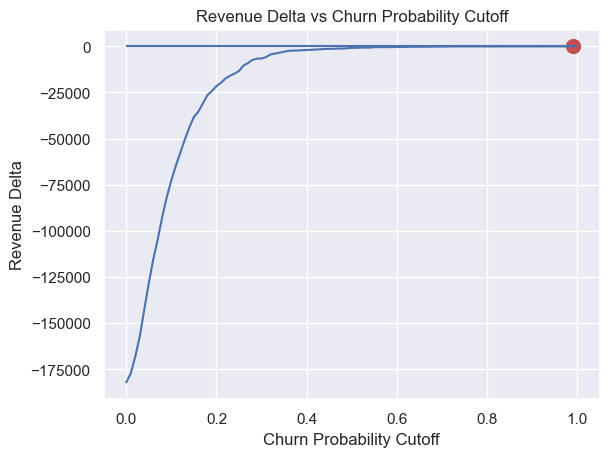

Maximum benefit at cutoff 0.99 with revenue delta of 0.00


In [73]:
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    rev_deltas.plot()
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas[max_pred], c='r', s=100)
    plt.xlabel('Churn Probability Cutoff')
    plt.ylabel('Revenue Delta')
    plt.title('Revenue Delta vs Churn Probability Cutoff')
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of {rev_deltas[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

## Determining the Cutoff

Below is a slightly modified function that chooses a cutoff that will potenbtially give a high revenue.

In [74]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float = 0.6, discount: float = 0.2, min_rev: float = 500) -> float:
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    pred.loc[(pred['churn_proba'] >= cutoff) & (pred['basecase_revenue'] > min_rev), 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    pred['rev_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['rev_delta'].sum()

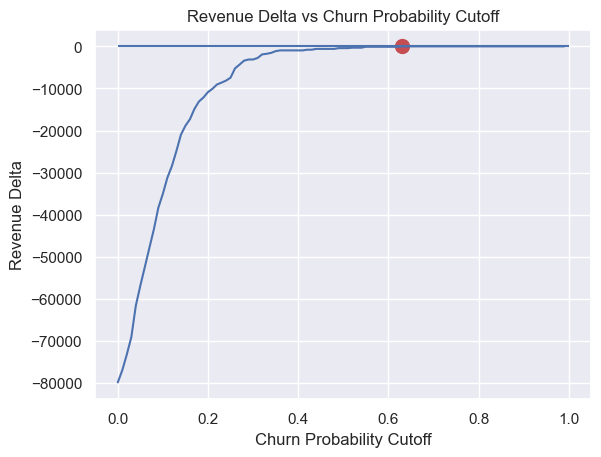

Maximum benefit at cutoff 0.63 with revenue delta of 0.00


In [75]:
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

plot_tradeoff(rev_deltas_high_value)